In [4]:
#Load the dataset into a pandas DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Amazon Sales data.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


Data Cleaning and Transformation

In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [7]:
#Handling Missing Values
df.dropna(inplace=True) 

In [10]:
df.columns = df.columns.str.strip()
df.rename(columns={'Order Date': 'Date', 'Ship Date': 'Ship_Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())


                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority       Date   Order ID  Ship_Date  Units Sold  \
0       Offline              H 2010-05-28  669165933  6/27/2010        9925   
1        Online              C 2012-08-22  963881480  9/15/2012        2804   
2       Offline              L 2014-05-02  341417157   5/8/2014        1779   
3        Online              C 2014-06-20  514321792   7/5/2014        8102   
4       Offline              L 2013-02-01  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [13]:
#Monthly sales Trend
monthly_sales = df.groupby('Month')['Total Revenue'].sum()
print(monthly_sales)


Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64


In [15]:
#Yearly sales trend
yearly_sales = df.groupby('Year')['Total Revenue'].sum()
print(yearly_sales)


Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


In [16]:
#yearly month-wise sales trend
yearly_monthly_sales = df.groupby(['Year', 'Month'])['Total Revenue'].sum().unstack()
print(yearly_monthly_sales)


Month          1           2          3           4           5           6   \
Year                                                                           
2010          NaN  3410661.12        NaN         NaN  2587973.26  1082418.40   
2011   1042225.35   387002.20        NaN  2798046.49   272410.45    19103.44   
2012   1012884.00  6707849.42  994765.42  4556012.38  3782781.82  2132075.27   
2013          NaN  3296425.02  835759.10  3262562.10         NaN  1352867.40   
2014          NaN  1819660.25        NaN  4510578.10  3060338.59    75591.66   
2015   5513227.50  2003911.12        NaN  1059987.26         NaN         NaN   
2016          NaN         NaN  197883.40         NaN   414371.10   568269.60   
2017   2914130.27  7115008.64  246415.95         NaN  3097864.77         NaN   

Month          7          8           9           10          11          12  
Year                                                                          
2010          NaN        NaN         NaN 

Visualization 

In [17]:
# plotting sales trends

In [18]:
import seaborn as sns

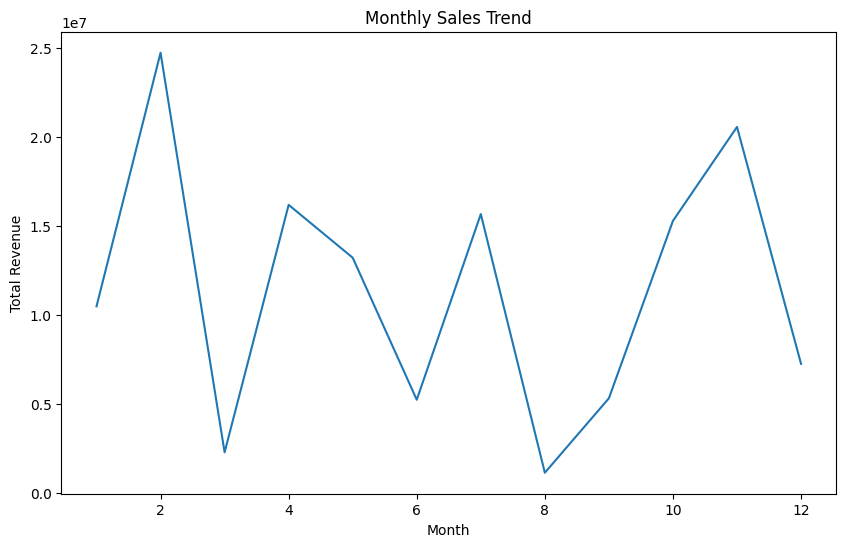

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.show()

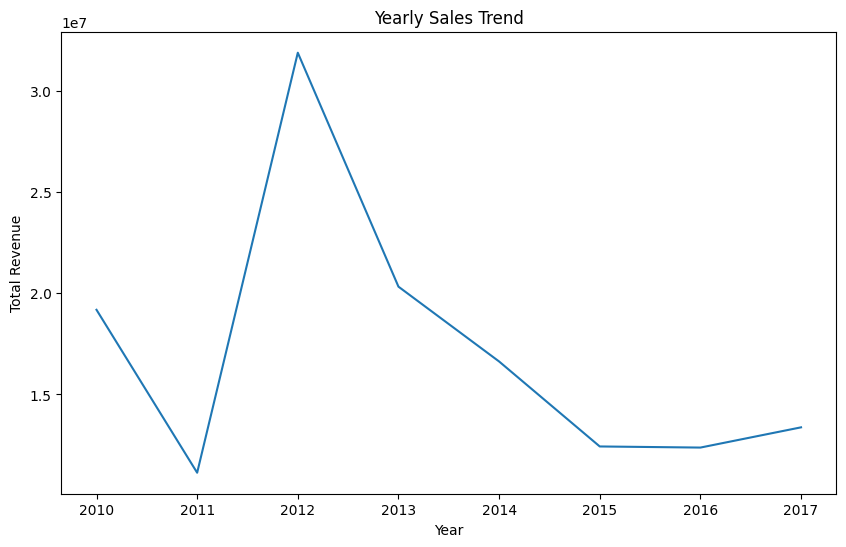

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales)
plt.title('Yearly Sales Trend')
plt.show()

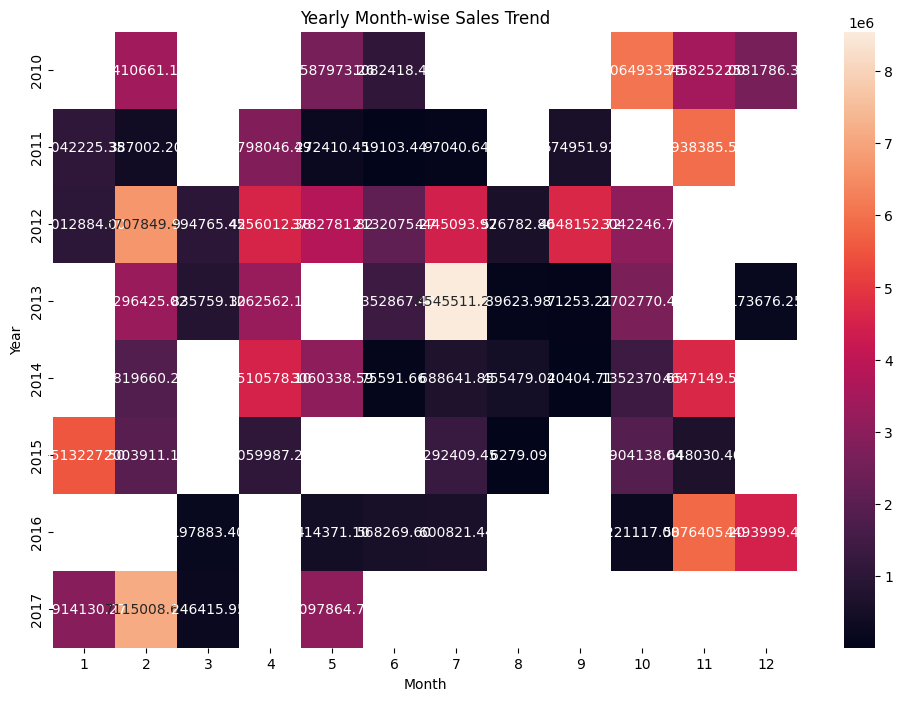

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(yearly_monthly_sales, annot=True,fmt='.2f')
plt.title('Yearly Month-wise Sales Trend')
plt.show()